# 1st. Image Resize (900, 600)

In [ ]:
# 라이브러리 import 
import cv2
import numpy as np
import os
import glob
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 이미지 파일 목록을 취득(패스)
pics=glob.glob('/content/drive/MyDrive/bump1/*.jpg')  # 경로 수정

# 조정 후 사이즈를 지정(베이스 이미지)
size=(900,600)
i = 1
# 리사이즈 처리
for pic in pics:
    base_pic=np.zeros((size[1],size[0],3),np.uint8)
    pic1=cv2.imread(pic,cv2.IMREAD_COLOR)
    h,w=pic1.shape[:2]
    ash=size[1]/h
    asw=size[0]/w
    if asw<ash:
        sizeas=(int(w*asw),int(h*asw))
    else:
        sizeas=(int(w*ash),int(h*ash))
    pic1 = cv2.resize(pic1,dsize=sizeas)
    base_pic[int(size[1]/2-sizeas[1]/2):int(size[1]/2+sizeas[1]/2), int(size[0]/2-sizeas[0]/2):int(size[0]/2+sizeas[0]/2),:]=pic1
    cv2.imwrite('/content/drive/MyDrive/bump1/resized/bump1_' + str(i) + '.jpg',base_pic)   # 파일 이름, 경로 수정
    i = i + 1 

# 2nd. Image Augmentation 
* Brightness, saturation, contrast, flip, rotate 

In [ ]:
import numpy as np
from matplotlib.pyplot import imshow, subplots, title
from PIL import Image
from torchvision import transforms
import albumentations
import random

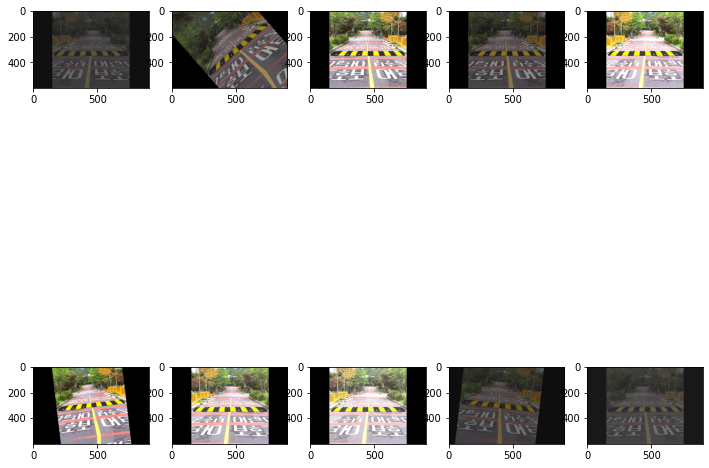

In [ ]:
#img = Image.open('/content/drive/MyDrive/bump1/resized/bump1_1.jpg') # 경로 수정

pics=glob.glob('/content/drive/MyDrive/bump1/resized/*.jpg')

#imgArray = np.array(img) # 이미지 분석을 위해 배열 전환
fig, ax = subplots(2, 5, figsize=(12, 12)) 

transform1 = albumentations.HorizontalFlip(p=0.5)
transform2 = albumentations.ShiftScaleRotate(p=0.5)
loader_transform = transforms.ColorJitter(brightness=0.5, saturation=0.5, contrast=0.5)

n = 1
nn = 1
for pic in pics:
    img = Image.open(pic)
    imgArray = np.array(img) # 이미지 분석을 위해 배열 전환

    for i in range(2):
        for j in range(5):
            newimg = transform1(image=imgArray)['image']
            newimg = transform2(image=newimg)['image']
            newimg = loader_transform(Image.fromarray(newimg))

            ax[i, j].imshow(newimg)

            newimg.save('/content/drive/MyDrive/bump1/augmented/bump1_'+ str(nn) + '_' + str(n) + '.jpg')
            n = n + 1
    nn = nn + 1